In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lists = []
path = '/home/alsch/PycharmProjects/knowlege_graphs_cms/results'
for file in os.listdir(path):
    if file.endswith('.txt') and '+' not in file:
        csv = pd.read_csv(os.path.join(path, file))
        lists.append(list(csv['Q_Error']))
results_np = np.array(lists)
results_np

array([[8.52480064e+03, 8.52480064e+03, 8.52480064e+03, ...,
        8.53355847e+03, 8.53355847e+03, 8.53355847e+03],
       [4.50061433e+05, 4.50061433e+05, 4.50061433e+05, ...,
        4.50074352e+05, 4.50074352e+05, 4.50074352e+05],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [3.00539574e+04, 3.00539574e+04, 3.00539574e+04, ...,
        3.38212355e+04, 3.38212355e+04, 3.38212355e+04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.03052928e+04, 2.03052928e+04, 2.03052928e+04, ...,
        2.33753996e+04, 2.33753996e+04, 2.33753996e+04]])

In [17]:
import numpy

numpy.std(results_np[0:, 3])
numpy.min(results_np[0:, 3])
numpy.max(results_np[0:, 3])

0.015625

In [6]:
mean_q_errors = []
for column in range(results_np.shape[1]):
    mean_q_errors.append(np.mean(np.abs(results_np[0:, column])))

data_frame = pd.read_csv('/home/alsch/PycharmProjects/knowlege_graphs_cms/results/result.csv0 + .txt')
data_frame = data_frame.drop(['Endings', 'Q_Error', 'Ellapsed Time', 'Count'], axis=1)
data_frame['Mean_Q_Error'] = mean_q_errors
data_frame['index'] = [i for i in range(len(data_frame))]
data_frame

,Hash Function,Noise Removal,Join Type,Add/Sub,Mean_Q_Error,index
0,BasicHashFunction,amin,object object,True,129287.014380,0
1,BasicHashFunction,median,object object,True,129287.014380,1
2,BasicHashFunction,No,object object,True,129287.014380,2
3,UniversalHashFunction,amin,object object,True,0.963973,3
4,UniversalHashFunction,median,object object,True,1.783799,4
5,UniversalHashFunction,No,object object,True,0.963973,5
6,IndependentHashFunction,amin,object object,True,113466.142043,6
7,IndependentHashFunction,median,object object,True,113466.142043,7
8,IndependentHashFunction,No,object object,True,113466.142043,8
9,BasicHashFunction,amin,object object,False,138660.317031,9


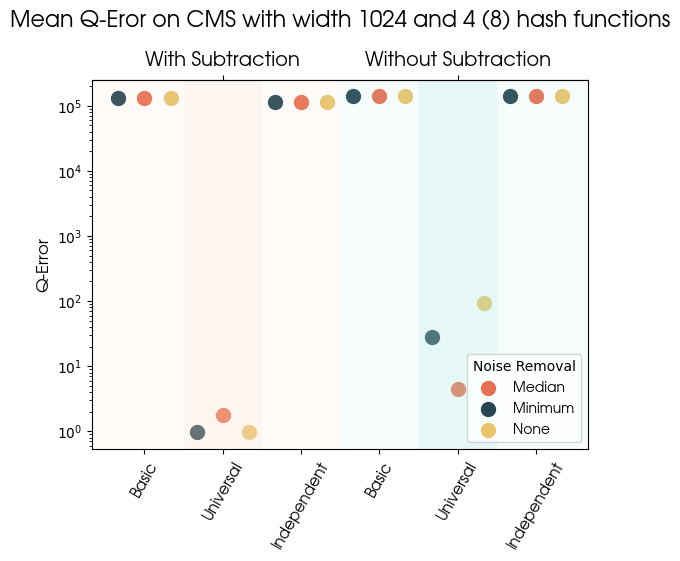

In [7]:
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots()

font = FontProperties(family='URW Gothic')

median_points = data_frame[data_frame['Noise Removal'] == 'median']
min_points = data_frame[data_frame['Noise Removal'] == 'amin']
none_points = data_frame[data_frame['Noise Removal'] == 'No']

plt.scatter(median_points['index'], median_points['Mean_Q_Error'], color='#E76F51', s=100)
plt.scatter(min_points['index'], min_points['Mean_Q_Error'], color='#264653', s=100)
plt.scatter(none_points['index'], none_points['Mean_Q_Error'], color='#e9c46a', s=100)
plt.ylabel('Q-Error', fontsize=12, fontname='URW Gothic')
plt.xlim(-1, 18)
plt.legend(['Median', 'Minimum', 'None'], title='Noise Removal', prop=font)
plt.xticks(np.arange(start=1, stop=18, step=3), ['Basic', 'Universal', 'Independent', 'Basic', 'Universal', 'Independent'], rotation=60, fontsize=11, fontname='URW Gothic')
last = -1
for i in np.arange(start=2.5, stop=18, step=3):
    alpha = 0.1 if (i+0.5)/3 % 2 else 0.3
    color = '#aee9e2' if i>8.5 else '#FBE1CB'
    i = i if i<17 else 18
    if i>8.5:
        if alpha == 0.1:
            alpha = 0.3
        else:
            alpha = 0.1
    plt.axvspan(xmax=i, xmin=last, ymax=100, ymin=0, facecolor=color, alpha=alpha)
    last = i
plt.yscale('log')
plt.title("Mean Q-Eror on CMS with width 1024 and 4 (8) hash functions", fontname='URW Gothic', size=16, y=1.12)

ax2 = ax.secondary_xaxis("top")
ax2.set_xticks([4, 13], ['With Subtraction', 'Without Subtraction'], rotation=0, fontsize=14, fontname='URW Gothic')
plt.savefig('plot.svg', format='svg', dpi=300, bbox_inches='tight', transparent=True)

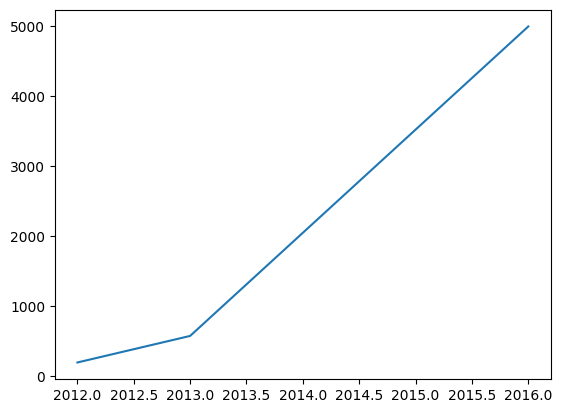

In [2]:
y = [570.0/3, 570, 5000]
x = [2012, 2013, 2016]

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.savefig('plot2.svg', format='svg', dpi=300, bbox_inches='tight', transparent=True)